## Keras example: mnist analysis by simple NN

In [1]:
# use TensorFlow 1.x 
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


In [2]:
%%time
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

    8192/11490434 [..............................] - ETA: 0s

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
CPU times: user 373 ms, sys: 72 ms, total: 445 ms
Wall time: 691 ms


In [3]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [4]:
type(X_train0)

numpy.ndarray

In [0]:
# For drawing figures
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

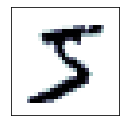

In [6]:
plt.figure(figsize=(2, 2))
plt.imshow(X_train0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

### Show images of numbers

이 코드 안냄

In [0]:
# 추가 사항
import numpy as np
# import matplotlib as mpl
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [0]:
plt.figure(figsize=(9,9))
example_images = np.r_[X_train0[:50]]
plot_digits(example_images, images_per_row=10)

plt.show()

### 데이터를 float 타입으로 바꾸고 스케일링한다.

In [7]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


### y 데이터는 One-Hot-Encoding 을 한다.

In [8]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
# Use function to_categorical() to do One-Hot-Encoding
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

정수 안에 인덱스 값을 1로 변경
(확률 구조)

***

> One-Hot-Encoding을 하는 이유
- 머신러닝의 목표가 특정 숫자 그림의 숫자를 정확하게 맞추는 것이 아니다.
    1. 일단, 0에서 9까지의 숫자로 판단될 10개의 확률을 계산한다.
    2. 그리고 특정 숫자로 판단될 확률이 제일 큰 수로 결정한다.
- 3개 이상의 클래스를 구분하는 지도학습의 경우 One-Hot-Encoding은 필요한 과정이다.

## fit 메서드로 트레이닝 (ML)

## SGD classifier

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

model = OneVsOneClassifier(SGDClassifier(max_iter=100, random_state=42))
model.fit(X_train, y_train0)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=100,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

(X_train, 타겟)

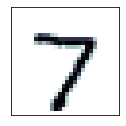

In [11]:
# test classifier using SGDClassifier
plt.figure(figsize=(2, 2))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
model.predict(X_test[:1, :])

array([7], dtype=uint8)

In [13]:
y_test0[0]

7

In [14]:
model.predict(X_test[:10,:]),y_test0[:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

### 테스트 데이터에 대한 예측 정확도 계산 

In [0]:
y_pred = model.predict(X_test)

In [16]:
y_pred.shape,type(y_pred),y_pred[:10]

((10000,), numpy.ndarray, array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8))

In [17]:
t_count = np.sum(y_pred==y_test0) # True positive
f_count = np.sum(y_pred!=y_test0) # False positive
f_count==10000-t_count

NameError: ignored

In [18]:
t_count,f_count

NameError: ignored

In [19]:
accuracy = t_count/10000*100
accuracy

NameError: ignored

### Accuracy of predicting test numbers is around 93% in ML using SGD classifier.

★★★  //nonzero

In [20]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(y_pred == y_test0)[0]          # 맞춘것
incorrect_indices = np.nonzero(y_pred != y_test0)[0]        # 틀린것
print()
print(len(correct_indices)," classified correctly")         # 맞춘 인덱스 길이
print(len(incorrect_indices)," classified incorrectly")     # 틀린 인덱스 길이 출력

NameError: ignored

In [21]:
correct_indices.shape,correct_indices[:10]

NameError: ignored

★★★★

In [22]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(y_pred[correct],
                                        y_test0[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(y_pred[incorrect], 
                                       y_test0[incorrect]))
    plt.xticks([])
    plt.yticks([])

# figure_evaluation

NameError: ignored

<Figure size 504x1008 with 0 Axes>

SGD 메서드 적용 ==> 93% 정확도